<img src="https://github.com/alan-barzilay/NLPortugues/blob/master/imagens/logo_nlportugues.png?raw=true"  style="height:65%" align="right">


# Lista 4 - Word2Vec 
**Nome:**

**Numero Usp:**













______________

Nessa lista nós exploraremos o espaço vetorial gerado pelo algoritmo Word2Vec e algumas de suas propriedades mais interessantes. Veremos como palavras similares se organizam nesse espaço e as relações de palavras com seus sinônimos e antônimos. Também veremos algumas analogias interessantes que o algoritmo é capaz de fazer ao capturar um pouco do nosso uso da língua portuguesa.


In [ ]:
from gensim.models import KeyedVectors

# Carregando dados


Para esta lista nós utilizaremos vetores de palavras, também conhecidos como *embeddings*, para lingua portuguesa fornecidos pelo [NILC](http://www.nilc.icmc.usp.br/nilc/index.php). Nós utilizaremos o embedding de 50 dimensões treinado com o algoritmo Word2Vec (Continous Bag of Words) que pode ser encontrado [aqui](http://www.nilc.icmc.usp.br/embeddings) sob a licensa [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/). Para evitar problemas de mémoria você deve utilizar apenas as 200 mil palavras mais comum. Nós ja fornecemos um script que realiza esse pré-processamento por você, basta baixar o arquivo `cbow_s50.zip` do site do NILC, extrai-lo na pasta deste notebook e rodar a célula seguinte.

In [ ]:
# Pré-processa embedding
N =  200001
with open("cbow_s50.txt", "r") as file:
    head = [next(file) for x in range(N)]

head[0] = str(N-1)+ " " + "50"+ "\n" # Conserta contagem de palavras
with open("word2vec_200k.txt", "w") as file:
    for line in head:
        file.write(line)

In [ ]:
# Carrega word2vec
model = KeyedVectors.load_word2vec_format("word2vec_200k.txt")

# Similaridade e Distância Cosseno 

Como comentamos em sala de aula, podemos considerar as palavras como pontos num espaço n-dimensional e podemos examinar a proximidade delas através da similaridade cosseno:
$$s = \frac{u \cdot v}{||u|| ||v||}, \textrm{ onde } s \in [-1, 1] $$ 


## <font color='blue'>Questão 1 </font>
Palavras [polissemicas](https://pt.wikipedia.org/wiki/Polissemia) e [homônimas](https://pt.wikipedia.org/wiki/Hom%C3%B3nimo) são palavras que possuem mais de um significado. 


Utilizando a função `model.most_similar()`, encontre uma palavra que possua múltiplos significados e que na sua lista de 10 palavras mais similares existam palavras relacionadas a mais de um dos seus significados, lembre-se de consultar sua [documentação](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar). 

Por exemplo, a palavra "manga" possui na sua lista de 10 palavras mais similares as palavras "gola" e "lapela" (que estão relacionadas ao significado de manga de uma camiseta) e a palavra "maçã" (que está relacionada ao significado da fruta manga).



In [ ]:
# Seu código aqui


**<font color='red'> Sua resposta aqui </font>**

# Sinônimos e Antônimos


As vezes é mais intuitivo trabalhar com uma medida de distancia ao invés da similaridade cosseno, para isso vamos utilizar a distancia cosseno que é simplesmente 1 - Similaridade Cosseno.

## <font color='blue'>Questão 2 </font>


Usando a função [`model.distance(palavra1,palavra2)`](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.distance), encontre 3 palavras onde as palavras p1 e p2 são sinônimas e p1 e p3 são antônimas mas `distance(p1,p3)` < `distance(p1,p2)`.

Proponha uma explicação do porque esse resultado contraintuitivo acontece.






In [ ]:
# Seu código aqui


**<font color='red'> Sua resposta aqui </font>**

# Analogias

Existem algumas analogias famosas realizadas por vetores de palavras. O exemplo mais famoso é provavelmente "man : king :: woman : x", onde x é *queen*.
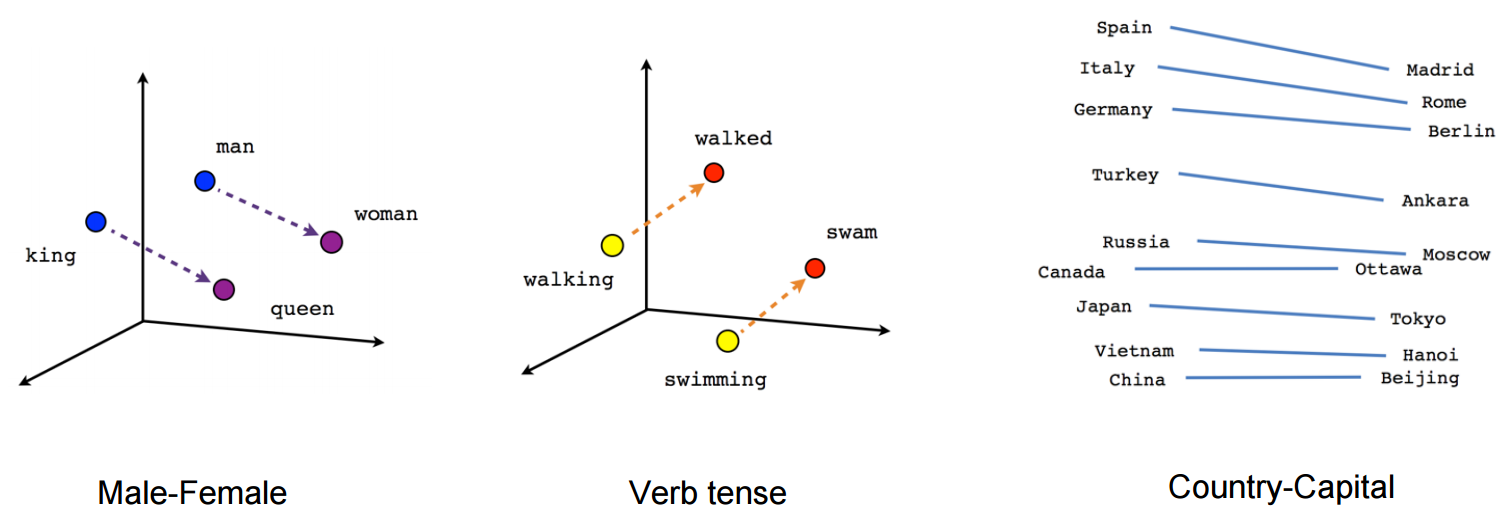

Para formular analogias vamos utilizar a função `most_similar()` que busca as palavras mais similares as listas em  `positive` e mais dissimilares as listadas em  `negative`. Para mais detalhes recomendamos consultar a sua [documentação](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar).




In [ ]:
model.most_similar(positive=['mulher', 'engenheiro'], negative=['homem'])

## <font color='blue'>Questão 3 </font>
Encontre analogias que funcionam, ou seja, que a palavra esperada está no topo da lista.

Descreva sua analogia na seguinte forma: 
x:y :: a:b



In [ ]:
# Seu código aqui


**<font color='red'> Sua resposta aqui </font>**

## <font color='blue'>Questão 4 </font>
Encontre analogias que **Não** funcionam.

Descreva o resultado esperado da sua analogia na seguinte forma: 
x:y :: a:b

E indique o valor errado de b encontrado



In [ ]:
# Seu código aqui


**<font color='red'> Sua resposta aqui </font>**

# Viés e preconceito adquirido

Como estes vetores são aprendidos a partir de documentos produzidos pela nossa sociedade, ele pode vir a capturar alguns preconceitos e desigualdades presentes na nossa sociedade. É importante estar ciente desse viés de nossos vetores e dos seus perigos, aplicações que utilizam esses modelos podem acabar perpetuando e até mesmo exacerbando desigualdades sociais.

Por exemplo, uma analogia problemática capturada:



In [ ]:
model.most_similar(positive=['negro', 'rico'], negative=['pobre'])

Note também como diferem as palavras mais semelhantes a homem e mulher:

In [ ]:
model.most_similar("homem")

In [ ]:
model.most_similar("mulher")

## <font color='blue'>Questão 5 </font>

Utiliza a função `most_similar()` para encontrar um outro caso de viés adquirido pelos vetores e explique brevemente o tipo de viés encontrado.



In [ ]:
# Seu código aqui


**<font color='red'> Sua resposta aqui </font>**

## <font color='blue'>Questão 6 </font>

Qual é a possivel origem desses vieses? Tente explicar como eles podem ter sido capturados pelos vetores de palavras.


**<font color='red'> Sua resposta aqui </font>**